# TRABAJO PRÁCTICO 2
# Alumno: Ezequiel Scordamaglia

# Filtrado ESPECTRAL

In [319]:
%matplotlib inline  
#%matplotlib qt
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [320]:
def create_gauss_filter(h, w, k_size, sigma):
    # Creo un kernel gaussiano
    gauss_kernel = cv.getGaussianKernel(k_size, sigma)
    gauss_kernel = gauss_kernel * gauss_kernel.T

    if h % 2 == 0:
        par_h = 1
    else:
        par_h = 0

    if w % 2 == 0:
        par_w = 1
    else:
        par_w = 0

    # Agrego padding al kernel
    gauss_kernel = np.pad(gauss_kernel, pad_width=((((h-k_size)//2)+par_h, ((h-k_size)//2)), (((w-k_size)//2)+par_w, ((w-k_size)//2))), mode='constant', constant_values=0)     

    # print(gauss_kernel.shape)

    # Transformada de Fourier del kernel
    gauss_kernel_fft = np.fft.fft2(gauss_kernel)

    return gauss_kernel, gauss_kernel_fft

def image_quality_measure(img):
    
    # Dimensiones de la imagen
    N = img.shape[0]
    # M = img.shape[1]

    # Calcular la transformada de furier de la imagen
    F = np.fft.fft2(img)
    Fc = np.fft.fftshift(F)
    AF = np.abs(Fc)
    M = np.max(AF)
    theres = M/1000

    # Numero de pixeles en F que sus valores > theres
    Th = np.sum(F > theres)
    
    FM = np.divide(Th, np.dot(M, N))

    return FM

def brenner_focus_measure(img):
    # img = img.astype(np.float32)
    phi = 0.0
    for i in range(0, img.shape[0]-2):
        for j in range(0, img.shape[1]):
            phi += np.abs(img[i, j].astype(np.float32) - img[i+2, j].astype(np.float32))**2

    return phi


Calidad de la imagen original:  6e-08


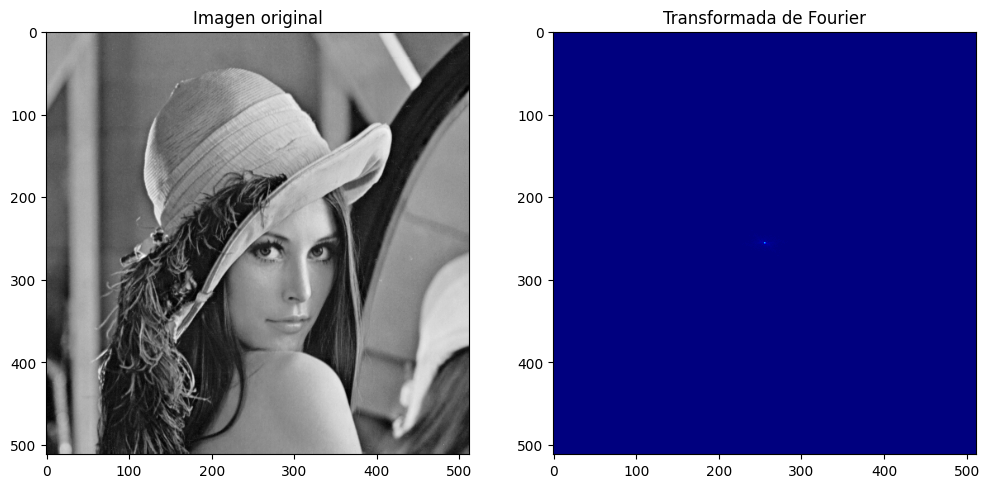

In [321]:
imagen = cv.imread('Lenna.png', cv.IMREAD_GRAYSCALE)
h, w = imagen.shape

f_imagen = np.fft.fft2(imagen)
f_imagen_shift = np.fft.fftshift(f_imagen)

plt.figure(figsize=(12,12))
plt.subplot(1,2,1)
# plt.axis('off')
plt.title("Imagen original")
plt.imshow(imagen, cmap='gray')
plt.subplot(1,2,2)
# plt.axis('off')
plt.title("Transformada de Fourier")
plt.imshow(np.abs(f_imagen_shift), cmap='jet')


print("Calidad de la imagen original: ", np.round(image_quality_measure(imagen), 8))

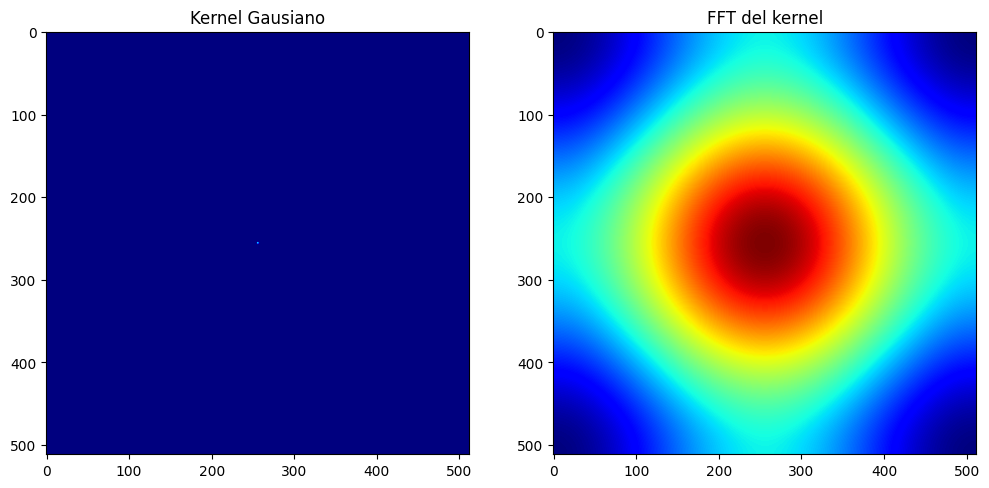

In [322]:
# DEFINO el K_size y el sigma
k_size = 15
sigma = 0.5

# arreglo de calidad de imagen
arr_calidad = []
arr_calidad_brenner = []
arr_sigma = []

# Genero el filtro gausiano
kernel, kernel_tf = create_gauss_filter(h, w, k_size, sigma)

plt.figure(figsize=(12,12))
plt.subplot(1,2,1)
# plt.axis('off')
plt.title("Kernel Gausiano")
plt.imshow(kernel, cmap='jet')
plt.subplot(1,2,2)
# plt.axis('off')
plt.title("FFT del kernel")
tf_shifted = np.fft.fftshift(kernel_tf)
plt.imshow(np.abs(tf_shifted), cmap='jet')

Calidad de la imagen 1:  6.09e-08
Calidad de la imagen 2:  6.1e-08


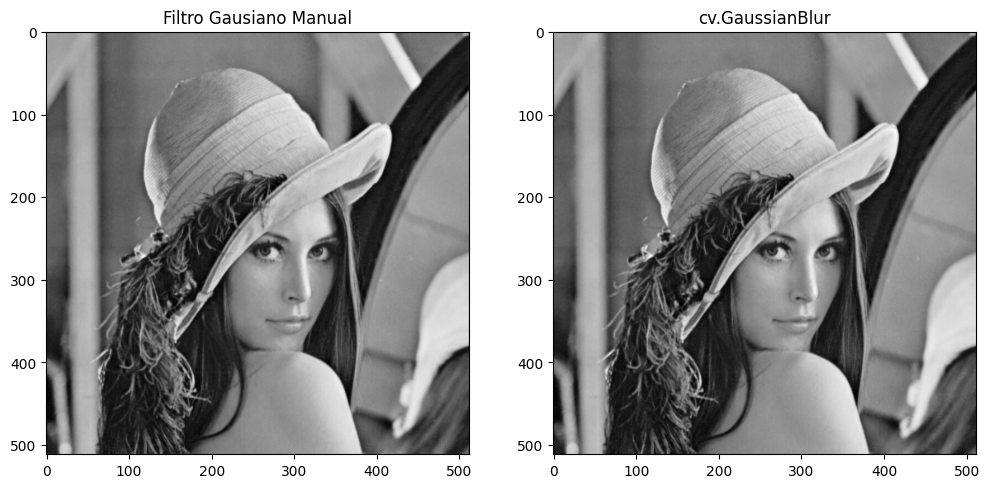

In [323]:
img_fft = np.fft.fft2(imagen)
filtered = img_fft * kernel_tf

#imagen_blur1 = np.real(np.fft.ifft2(np.fft.ifftshift(filtered)))
imagen_blur1 = np.fft.ifftshift(np.real(np.fft.ifft2(filtered)))

imagen_blur2 = cv.GaussianBlur(imagen, (k_size, k_size), sigma)

plt.figure(figsize=(12,12))
plt.subplot(1,2,1)
# plt.axis('off')
plt.title("Filtro Gausiano Manual")
plt.imshow(imagen_blur1, cmap='gray')
plt.subplot(1,2,2)
# plt.axis('off')
plt.title("cv.GaussianBlur")
plt.imshow(imagen_blur2, cmap='gray')


print("Calidad de la imagen 1: ", np.round(image_quality_measure(imagen_blur1), 10))
print("Calidad de la imagen 2: ", np.round(image_quality_measure(imagen_blur2), 10))

arr_calidad.append(image_quality_measure(imagen_blur1))
arr_calidad_brenner.append(brenner_focus_measure(imagen_blur1))
arr_sigma.append(sigma)

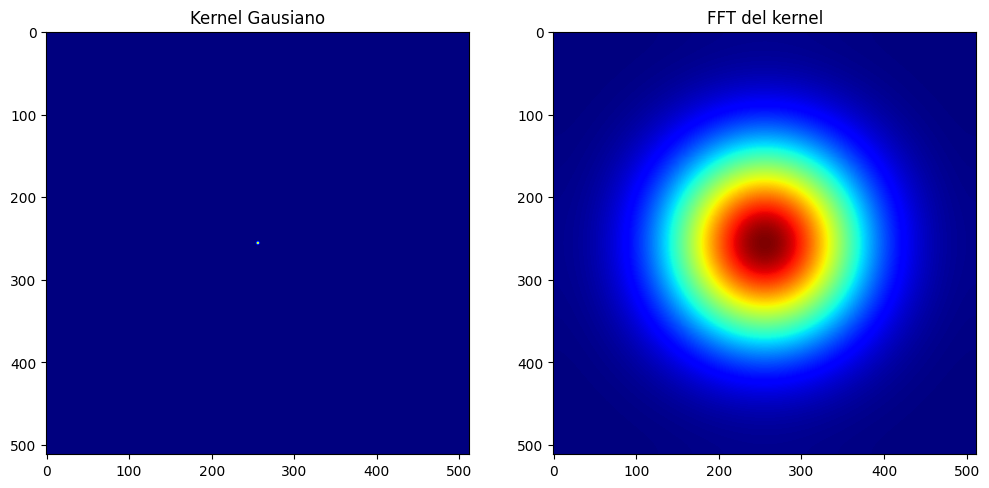

In [324]:
# DEFINO el K_size y el sigma
k_size = 15
sigma = 1

# Genero el filtro gausiano
kernel, kernel_tf = create_gauss_filter(h, w, k_size, sigma)

plt.figure(figsize=(12,12))
plt.subplot(1,2,1)
# plt.axis('off')
plt.title("Kernel Gausiano")
plt.imshow(kernel, cmap='jet')
plt.subplot(1,2,2)
# plt.axis('off')
plt.title("FFT del kernel")
tf_shifted = np.fft.fftshift(kernel_tf)
plt.imshow(np.abs(tf_shifted), cmap='jet')


Calidad de la imagen 1:  5.55e-08
Calidad de la imagen 2:  5.58e-08


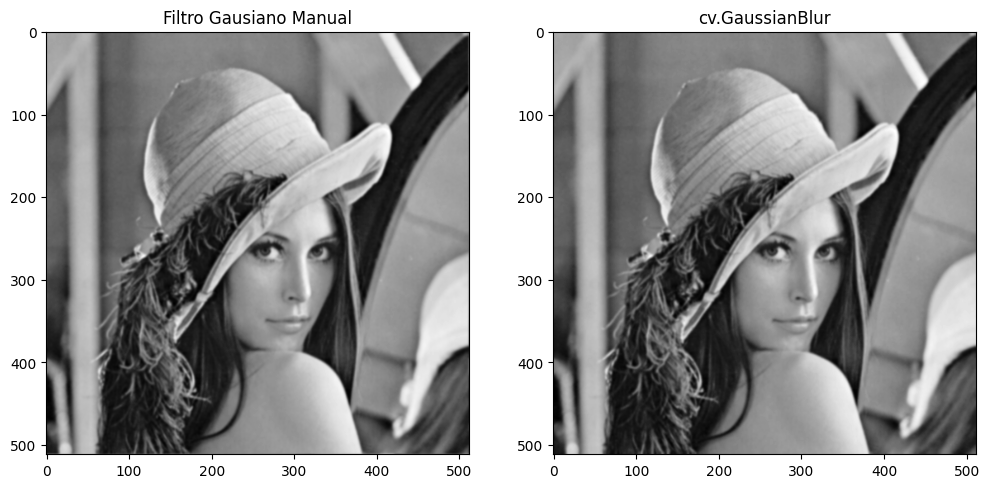

In [325]:

img_fft = np.fft.fft2(imagen)
filtered = img_fft * kernel_tf

imagen_blur1 = np.fft.ifftshift(np.real(np.fft.ifft2(filtered)))

imagen_blur2 = cv.GaussianBlur(imagen, (k_size, k_size), sigma)

plt.figure(figsize=(12,12))
plt.subplot(1,2,1)
# plt.axis('off')
plt.title("Filtro Gausiano Manual")
plt.imshow(imagen_blur1, cmap='gray')
plt.subplot(1,2,2)
# plt.axis('off')
plt.title("cv.GaussianBlur")
plt.imshow(imagen_blur2, cmap='gray')


print("Calidad de la imagen 1: ", np.round(image_quality_measure(imagen_blur1), 10))
print("Calidad de la imagen 2: ", np.round(image_quality_measure(imagen_blur2), 10))

arr_calidad.append(image_quality_measure(imagen_blur1))
arr_calidad_brenner.append(brenner_focus_measure(imagen_blur1))
arr_sigma.append(sigma)

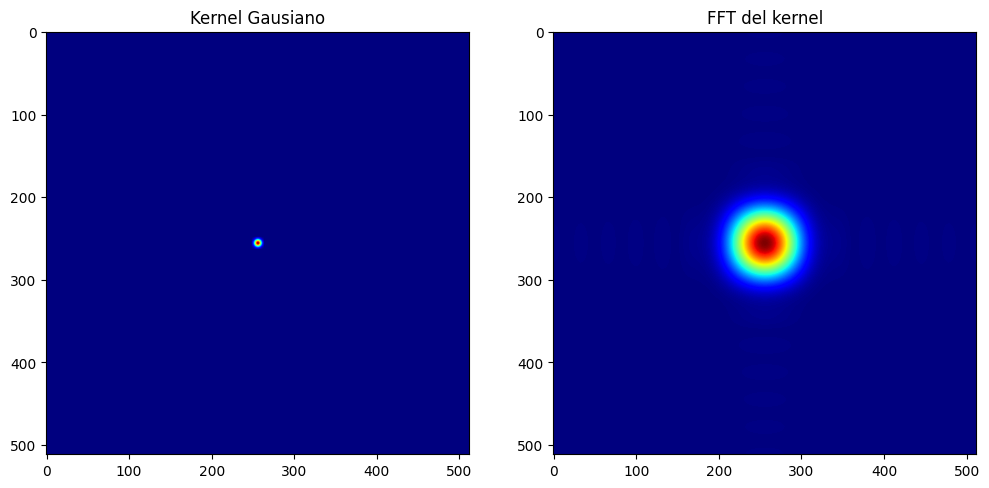

In [326]:
# DEFINO el K_size y el sigma
k_size = 15
sigma = 3

# Genero el filtro gausiano
kernel, kernel_tf = create_gauss_filter(h, w, k_size, sigma)

plt.figure(figsize=(12,12))
plt.subplot(1,2,1)
# plt.axis('off')
plt.title("Kernel Gausiano")
plt.imshow(kernel, cmap='jet')
plt.subplot(1,2,2)
# plt.axis('off')
plt.title("FFT del kernel")
tf_shifted = np.fft.fftshift(kernel_tf)
plt.imshow(np.abs(tf_shifted), cmap='jet')


Calidad de la imagen 1:  3.48e-08
Calidad de la imagen 2:  3.69e-08


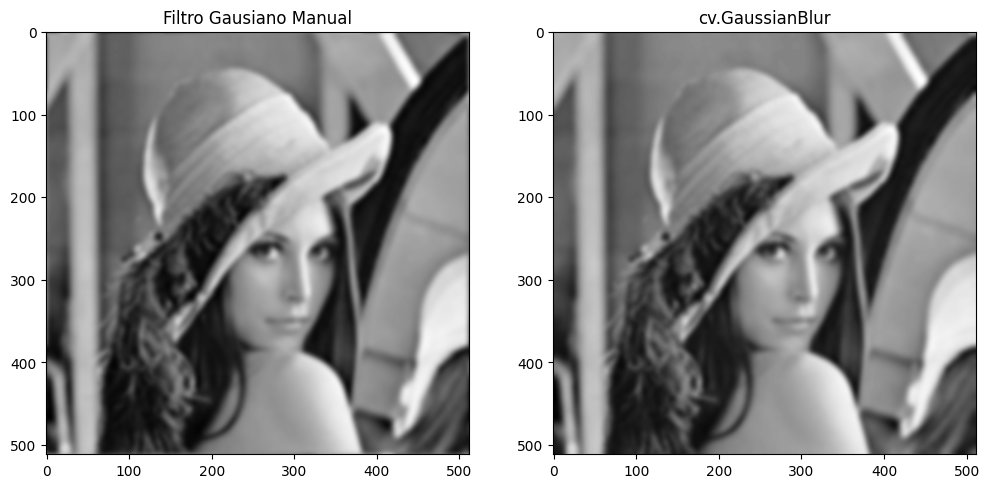

In [327]:
img_fft = np.fft.fft2(imagen)
filtered = img_fft * kernel_tf

imagen_blur1 = np.fft.ifftshift(np.real(np.fft.ifft2(filtered)))

imagen_blur2 = cv.GaussianBlur(imagen, (k_size, k_size), sigma)

plt.figure(figsize=(12,12))
plt.subplot(1,2,1)
# plt.axis('off')
plt.title("Filtro Gausiano Manual")
plt.imshow(imagen_blur1, cmap='gray')
plt.subplot(1,2,2)
# plt.axis('off')
plt.title("cv.GaussianBlur")
plt.imshow(imagen_blur2, cmap='gray')

print("Calidad de la imagen 1: ", np.round(image_quality_measure(imagen_blur1), 10))
print("Calidad de la imagen 2: ", np.round(image_quality_measure(imagen_blur2), 10))

arr_calidad.append(image_quality_measure(imagen_blur1))
arr_calidad_brenner.append(brenner_focus_measure(imagen_blur1))
arr_sigma.append(sigma)

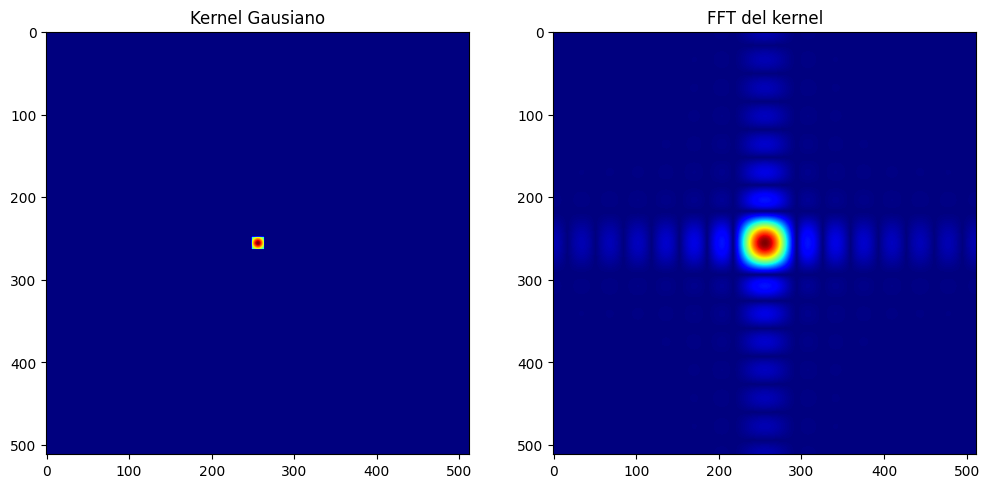

In [328]:
# DEFINO el K_size y el sigma
k_size = 15
sigma = 7

# Genero el filtro gausiano
kernel, kernel_tf = create_gauss_filter(h, w, k_size, sigma)

plt.figure(figsize=(12,12))
plt.subplot(1,2,1)
# plt.axis('off')
plt.title("Kernel Gausiano")
plt.imshow(kernel, cmap='jet')
plt.subplot(1,2,2)
# plt.axis('off')
plt.title("FFT del kernel")
tf_shifted = np.fft.fftshift(kernel_tf)
plt.imshow(np.abs(tf_shifted), cmap='jet')

Calidad de la imagen 1:  2.67e-08
Calidad de la imagen 2:  2.81e-08


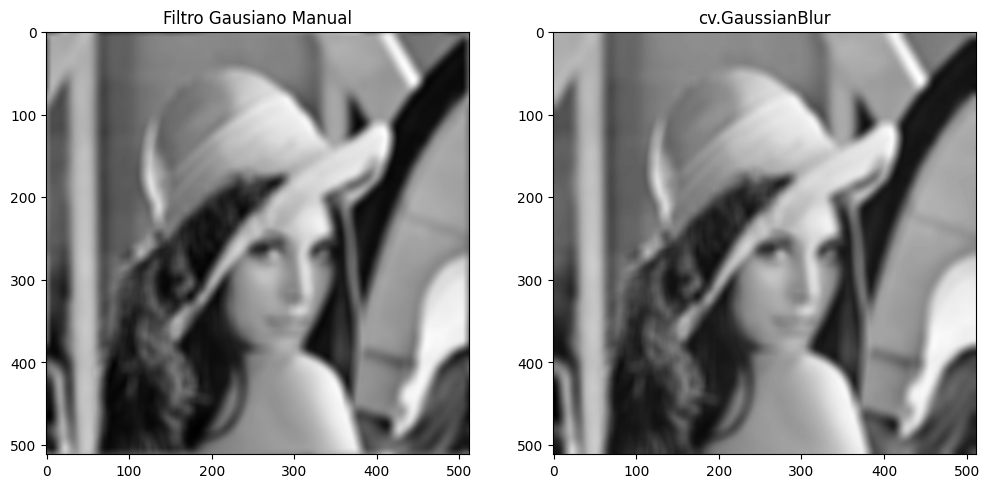

In [329]:
img_fft = np.fft.fft2(imagen)
filtered = img_fft * kernel_tf

imagen_blur1 = np.fft.ifftshift(np.real(np.fft.ifft2(filtered)))

imagen_blur2 = cv.GaussianBlur(imagen, (k_size, k_size), sigma)

plt.figure(figsize=(12,12))
plt.subplot(1,2,1)
# plt.axis('off')
plt.title("Filtro Gausiano Manual")
plt.imshow(imagen_blur1, cmap='gray')
plt.subplot(1,2,2)
# plt.axis('off')
plt.title("cv.GaussianBlur")
plt.imshow(imagen_blur2, cmap='gray')

print("Calidad de la imagen 1: ", np.round(image_quality_measure(imagen_blur1), 10))
print("Calidad de la imagen 2: ", np.round(image_quality_measure(imagen_blur2), 10))

arr_calidad.append(image_quality_measure(imagen_blur1))
arr_calidad_brenner.append(brenner_focus_measure(imagen_blur1))
arr_sigma.append(sigma)

Text(0, 0.5, 'Calidad de imagen Brenner')

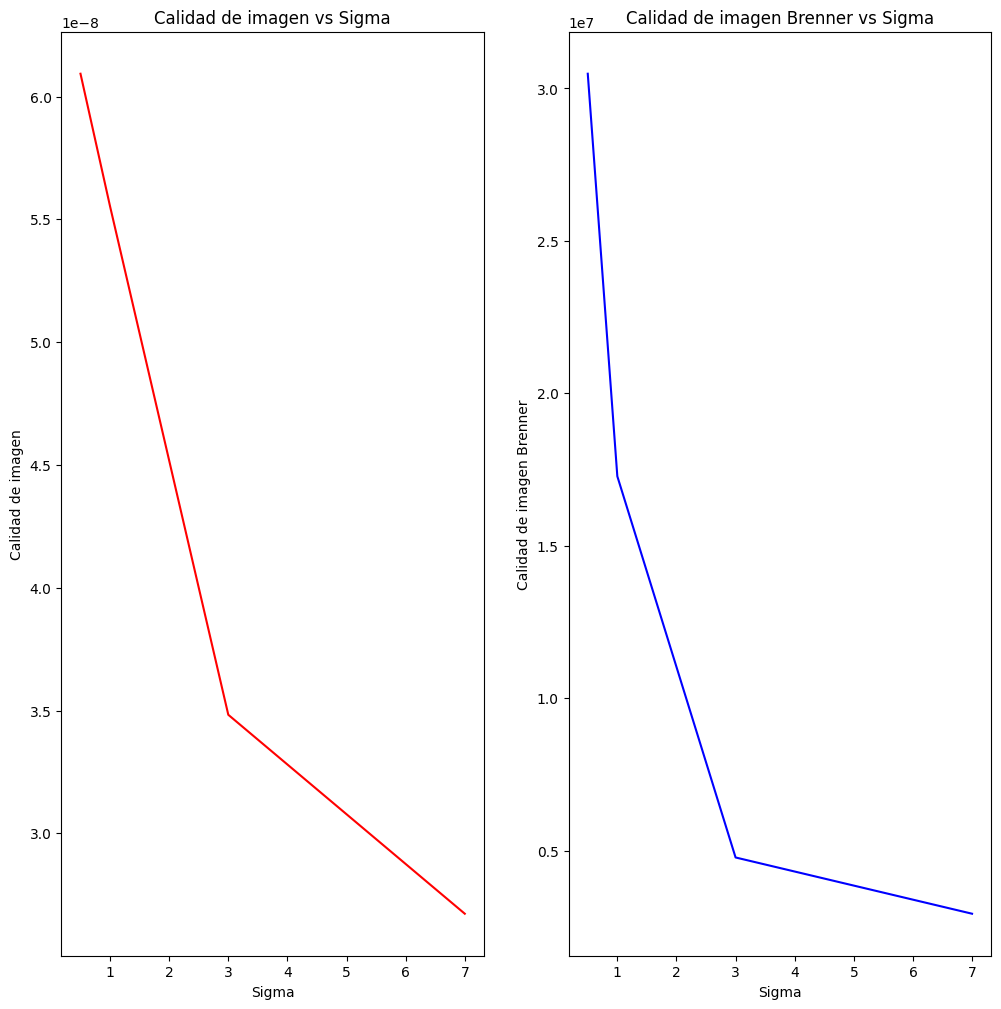

In [330]:
# Graficar arr_calidad y arr_calidad_brenner segun arr_sigma
plt.figure(figsize=(12,12))
plt.subplot(1,2,1)
plt.title("Calidad de imagen vs Sigma")
plt.plot(arr_sigma, arr_calidad, 'r')
plt.xlabel('Sigma')
plt.ylabel('Calidad de imagen')
plt.subplot(1,2,2)
plt.title("Calidad de imagen Brenner vs Sigma")
plt.plot(arr_sigma, arr_calidad_brenner, 'b')
plt.xlabel('Sigma')
plt.ylabel('Calidad de imagen Brenner')


# Filtrado ESPACIAL

In [331]:
imagen = cv.imread('Lenna.png', cv.IMREAD_GRAYSCALE)
h, w = imagen.shape

# Array de calidad y sigma
arr_calidad = []
arr_calidad_brenner = []
arr_sigma = []


In [332]:
nucleo_g_1 = cv.getGaussianKernel(ksize=15, sigma=1.5) 
kernel_1 = nucleo_g_1 * nucleo_g_1.T
result_1 = cv.filter2D(imagen, -1, kernel_1)
arr_calidad.append(image_quality_measure(result_1))
arr_calidad_brenner.append(brenner_focus_measure(result_1))
arr_sigma.append(1.5)

nucleo_g_2 = cv.getGaussianKernel(ksize=15, sigma=3)
kernel_2 = nucleo_g_2 * nucleo_g_2.T
result_2 = cv.filter2D(imagen, -1, kernel_2)
arr_calidad.append(image_quality_measure(result_2))
arr_calidad_brenner.append(brenner_focus_measure(result_2))
arr_sigma.append(3)

nucleo_g_3 = cv.getGaussianKernel(ksize=15, sigma=5)
kernel_3 = nucleo_g_3 * nucleo_g_3.T
result_3 = cv.filter2D(imagen, -1, kernel_3)
arr_calidad.append(image_quality_measure(result_3))
arr_calidad_brenner.append(brenner_focus_measure(result_3))
arr_sigma.append(5)

nucleo_g_4 = cv.getGaussianKernel(ksize=15, sigma=7)
kernel_4 = nucleo_g_4 * nucleo_g_4.T
result_4 = cv.filter2D(imagen, -1, kernel_4)
arr_calidad.append(image_quality_measure(result_4))
arr_calidad_brenner.append(brenner_focus_measure(result_4))
arr_sigma.append(7)

nucleo_g_5 = cv.getGaussianKernel(ksize=15, sigma=9)
kernel_5 = nucleo_g_5 * nucleo_g_5.T
result_5 = cv.filter2D(imagen, -1, kernel_5)
arr_calidad.append(image_quality_measure(result_5))
arr_calidad_brenner.append(brenner_focus_measure(result_5))
arr_sigma.append(9)

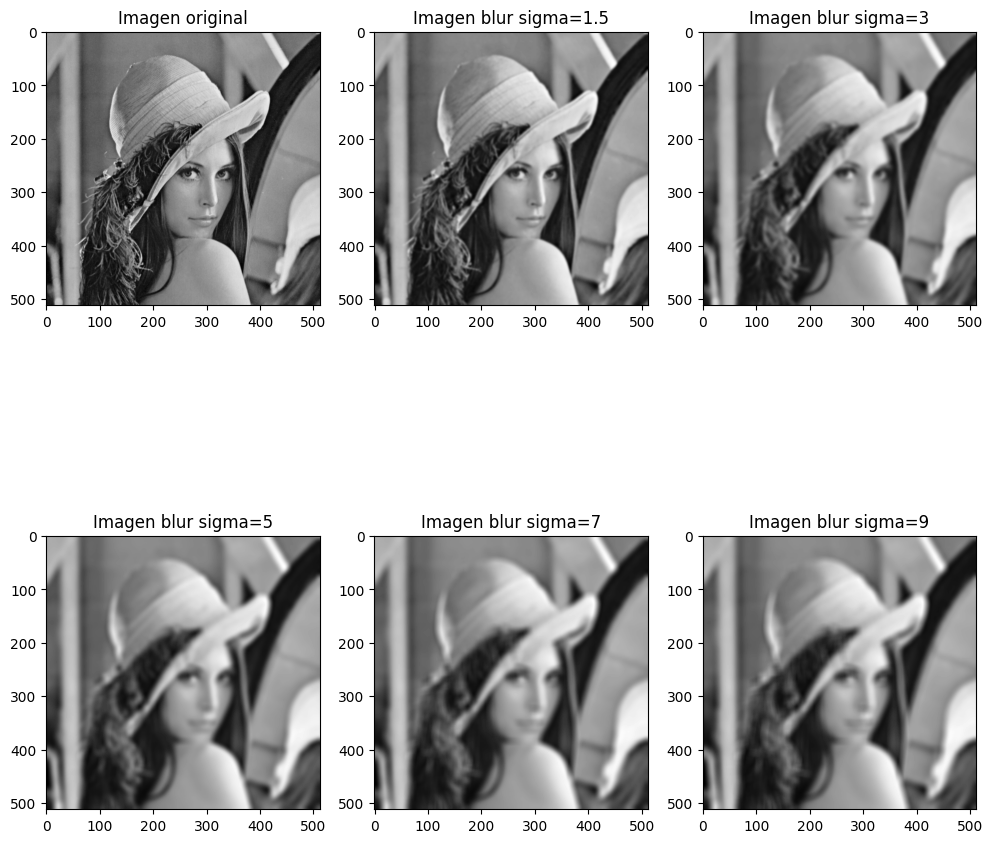

In [333]:
plt.figure(figsize=(12,12))
plt.subplot(2,3,1)
plt.title("Imagen original")
plt.imshow(imagen, cmap='gray')
plt.subplot(2,3,2)
plt.title("Imagen blur sigma=1.5")
plt.imshow(result_1, cmap='gray')
plt.subplot(2,3,3)
plt.title("Imagen blur sigma=3")
plt.imshow(result_2, cmap='gray')
plt.subplot(2,3,4)
plt.title("Imagen blur sigma=5")
plt.imshow(result_3, cmap='gray')
plt.subplot(2,3,5)
plt.title("Imagen blur sigma=7")
plt.imshow(result_4, cmap='gray')
plt.subplot(2,3,6)
plt.title("Imagen blur sigma=9")
plt.imshow(result_5, cmap='gray')

Text(0, 0.5, 'Calidad de imagen Brenner')

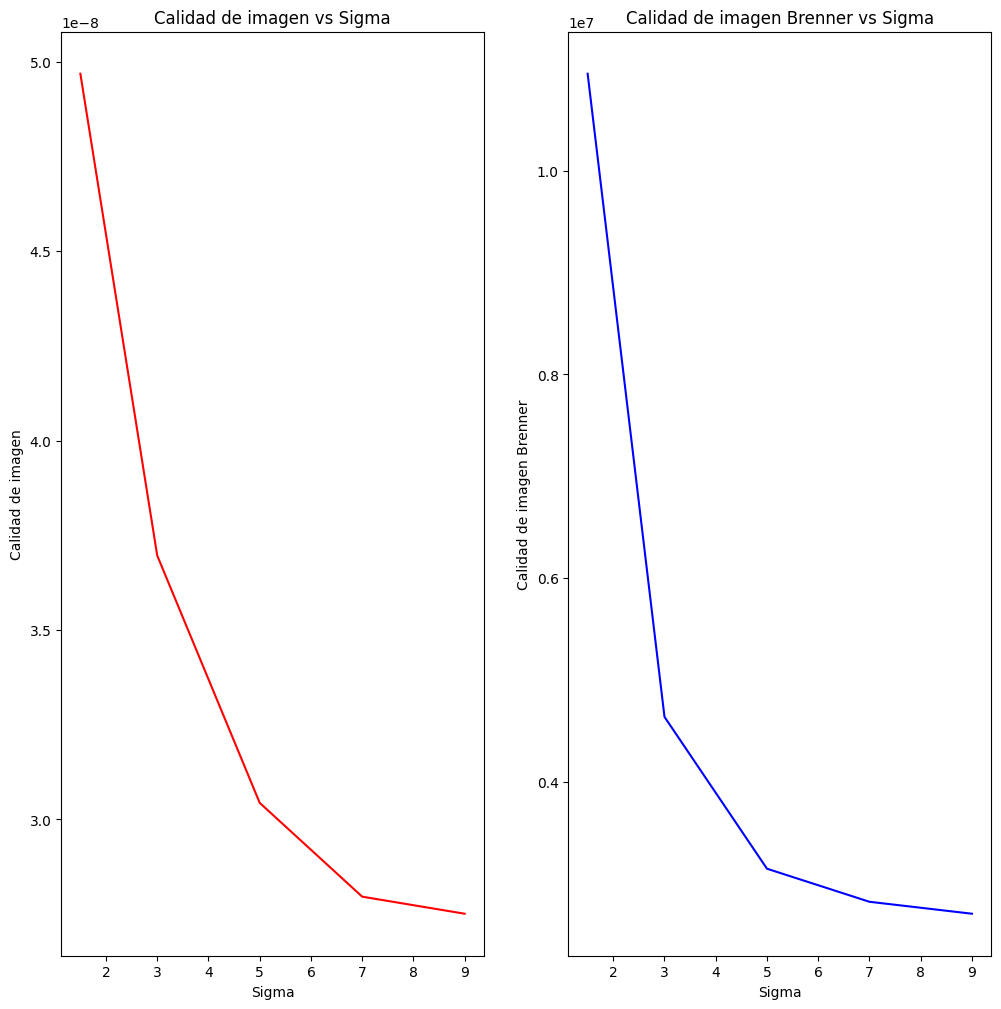

In [334]:
# Graficar arr_calidad y arr_calidad_brenner segun arr_sigma
plt.figure(figsize=(12,12))
plt.subplot(1,2,1)
plt.title("Calidad de imagen vs Sigma")
plt.plot(arr_sigma, arr_calidad, 'r')
plt.xlabel('Sigma')
plt.ylabel('Calidad de imagen')
plt.subplot(1,2,2)
plt.title("Calidad de imagen Brenner vs Sigma")
plt.plot(arr_sigma, arr_calidad_brenner, 'b')
plt.xlabel('Sigma')
plt.ylabel('Calidad de imagen Brenner')
